In [0]:
import numpy as np
import pandas as pd
import matplotlib as mlp


In [0]:
data=pd.read_csv('dengue_features_train.csv.csv')


In [0]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [0]:
#removing the rows with multiple empty columns
data.dropna(subset=['reanalysis_air_temp_k'], inplace=True)

In [0]:
data=data.fillna(data.mean())

In [0]:
from sklearn import preprocessing
data['city']=preprocessing.LabelEncoder().fit_transform(data.city.values)


In [0]:
#applying log to Y
data.total_cases[data[data.total_cases==0].index]=0.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
data=data.drop(['week_start_date'],axis=1)


In [0]:
data.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,1,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,1,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,1,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


In [0]:
# from scipy.special import boxcox1p
# data.iloc[-1].values=boxcox1p(data.iloc[-1].values)

In [0]:
'''
#trying winsorization
from scipy.stats import mstats
data =pd.DataFrame(mstats.winsorize(data, limits=[0.05, 0.05]))
'''

# removing outliers 

from scipy import stats
data=data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]



In [0]:
#separate train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,:-1].values,data.iloc[:,-1].values,test_size=0.3,random_state=10)

In [0]:
#converting numpy array to dataframe
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
X_test=pd.DataFrame(X_test)
y_test=pd.DataFrame(y_test)

In [0]:
y_train2=y_train

In [0]:
y_train=np.power(y_train,1./3)

In [0]:
#Doing operations on the non pca data

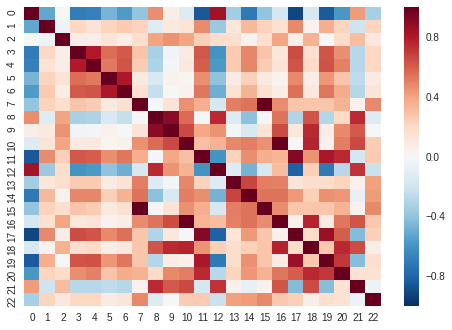

In [0]:
import seaborn as sns
corr=X_train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

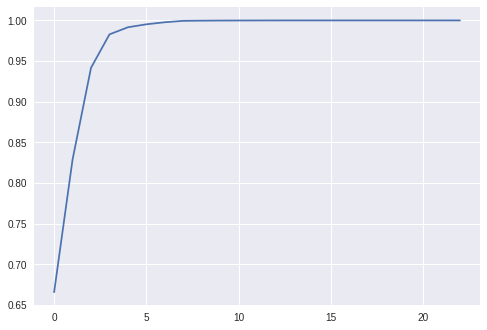

In [0]:
# implementing PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#pca = PCA(n_components=22)
pca = PCA().fit(X_train.values)
#X_pca=pca.fit_transform(X_train.values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#X_pca=pd.DataFrame(X_pca)

In [0]:
pca = PCA(n_components=4)
X_pca=pca.fit_transform(X_train.values)
X_pca=pd.DataFrame(X_pca)

In [0]:
#checking the significance of vars

import statsmodels.api as sm
from sklearn import linear_model

X=X_pca
y=y_train
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     20.92
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           1.65e-16
Time:                        13:57:17   Log-Likelihood:                -1238.6
No. Observations:                 904   AIC:                             2487.
Df Residuals:                     899   BIC:                             2511.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3725      0.032     74.696      0.000       2.310       2.435
0             -0.0021      0.001     -3.936      0.000      -0.003      -0.001
1             -0.0014      0.001     -1.274      0.203      -0.004       0.001
2              0.0040      0.001      3.037      0.002       0.001       0.007
3             -0.0166      0.002     -7.573      0.000      -0.021      -0.012
==============================================================================
Omnibus:                       17.894   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.701
Skew:                           0.349   Prob(JB):                     8.69e-05
Kurtosis:                       2.910   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
#implemeting pca on test data

'''pca = PCA(n_components=9)
X_pca_test=pca.fit_transform(X_test.values)
X_pca_test=pd.DataFrame(X_pca_test)'''

'pca = PCA(n_components=9)\nX_pca_test=pca.fit_transform(X_test.values)\nX_pca_test=pd.DataFrame(X_pca_test)'

In [0]:
!pip install yellowbrick

    100% |████████████████████████████████| 245kB 6.7MB/s 


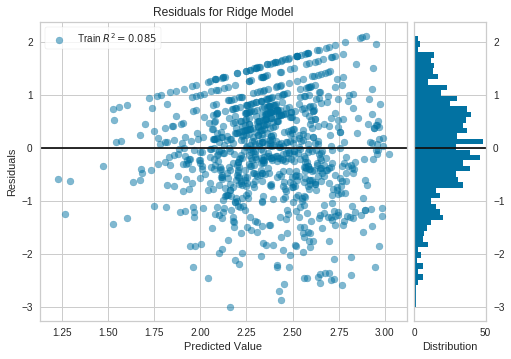

In [0]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_pca.values, y_train.values)  # Fit the training data to the model
#visualizer.score(X_pca_test.values,y_test.values)  # Evaluate the model on the test data
visualizer.poof()       

In [0]:
from sklearn.cluster import KMeans

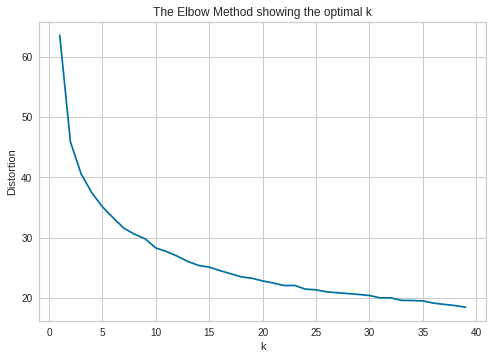

In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
K = range(1,40)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_pca)
    kmeanModel.fit(X_pca)
    distortions.append(sum(np.min(cdist(X_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_pca.shape[0])
    
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [0]:
kmeans=KMeans(n_clusters=4,random_state=10).fit(X_pca)
predict=kmeans.predict(X_pca)

In [0]:
X_pca['KMeans Cluster'] = pd.Series(predict, index=X_pca.index)

In [0]:
result=pd.concat([X_pca,y_train],axis=1)

In [0]:
result.head()


,0,1,2,3,KMeans Cluster,0
0,-73.364619,-4.245573,-1.873751,-18.370066,1,3.239612
1,-57.538193,-14.357158,-7.234652,-7.823328,1,1.912931
2,-46.401139,-21.946478,-14.209789,-25.939381,1,0.793701
3,-32.967412,-17.231527,9.373626,-9.919503,1,3.892996
4,16.346112,-26.732410,-5.803910,-8.110731,0,4.514357


In [0]:
grp1=result[result['KMeans Cluster']==0].drop(['KMeans Cluster'],axis=1)
grp2=result[result['KMeans Cluster']==1].drop(['KMeans Cluster'],axis=1)
grp3=result[result['KMeans Cluster']==2].drop(['KMeans Cluster'],axis=1)
grp4=result[result['KMeans Cluster']==3].drop(['KMeans Cluster'],axis=1)


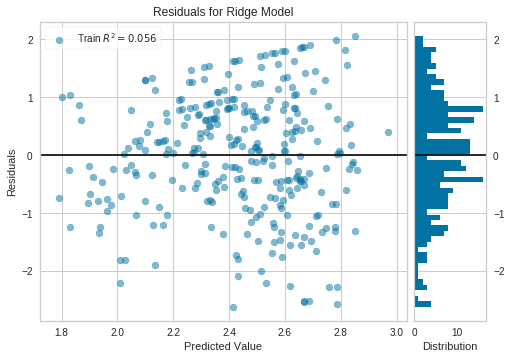

In [0]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(grp1.iloc[:,:-1].values, grp1.iloc[:,-1].values)  # Fit the training data to the model
#visualizer.score(X_pca_test.values,y_test.values)  # Evaluate the model on the test data
visualizer.poof()    

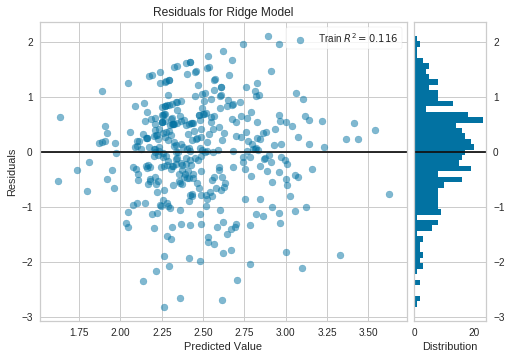

In [0]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(grp2.iloc[:,:-1].values, grp2.iloc[:,-1].values)  # Fit the training data to the model
#visualizer.score(X_pca_test.values,y_test.values)  # Evaluate the model on the test data
visualizer.poof()

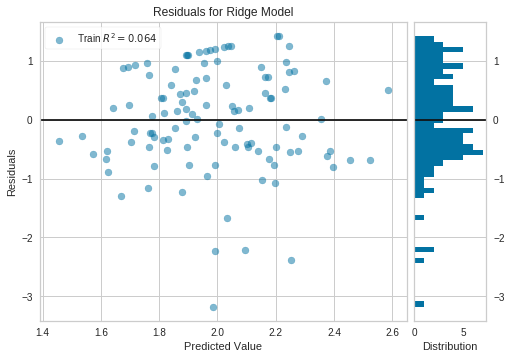

In [0]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(grp3.iloc[:,:-1].values, grp3.iloc[:,-1].values)  # Fit the training data to the model
#visualizer.score(X_pca_test.values,y_test.values)  # Evaluate the model on the test data
visualizer.poof()

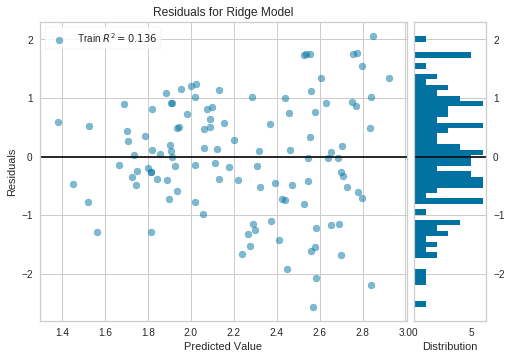

In [0]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(grp4.iloc[:,:-1].values, grp4.iloc[:,-1].values)  # Fit the training data to the model
#visualizer.score(X_pca_test.values,y_test.values)  # Evaluate the model on the test data
visualizer.poof()

In [0]:
#plt.scatter(X_pca.iloc[:,3].values,y_train.iloc[:,0].values)